In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc
import anndata


In [2]:
import os
os.chdir("/nas/LiuWei/Projects/IntTemporalSpatial/DLPFC12/DR_Rdata/paga_analysis")

In [103]:
### Analyze sample 1
## read celltype 
df = pd.read_csv('cluster_iscmeb_pois_rename_L52WM_sample1_DLPFC12.csv')
celltype = df.x
celltype

0       Layer2/3
1       Layer3/4
2         Layer1
3             WM
4         Layer6
          ...   
4221    Layer3/4
4222      Layer6
4223          WM
4224    Layer4/5
4225      Layer1
Name: x, Length: 4226, dtype: object

In [104]:
## read raw count
#adata = anndata.read_text('log_count_DLPFC12.csv')
# read the CSV file into a DataFrame
df = pd.read_csv('rawcount_sample1_DLPFC12.csv', index_col=0)

In [105]:
df

,IGKC,NPY,HBB,PLP1,SCGB2A2,HBA2,MBP,IGHG4,IGHG3,SST,...,GNB3,CCDC174,ATP5MC3,FFAR4,SP3,GIMAP4,ZNF566,DPYSL5,ZNF786,HMBOX1
1,2,0,2,0,2,0,5,2,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,2,6,1,3,0,1,0,...,0,0,2,0,0,0,0,0,0,0
3,0,0,0,1,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,68,10,0,41,0,0,0,...,0,0,1,0,0,0,0,2,0,0
5,13,1,0,1,14,0,10,2,2,0,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4222,0,0,0,1,1,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4223,0,1,2,6,3,0,6,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4224,1,0,9,6,6,3,9,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4225,0,0,0,3,5,0,8,0,0,2,...,0,0,2,0,1,0,0,0,0,0


In [134]:
# create an AnnData object from the DataFrame
adata = anndata.AnnData(df)

# set the names of the observations and variables
adata.obs_names = df.index.tolist()
adata.var_names = df.columns.tolist()

/tmp/ipykernel_57741/1376865779.py:2: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:872: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


In [10]:
adata

AnnData object with n_obs × n_vars = 4226 × 2000

In [135]:
## read embeddings
Ez_u = pd.read_csv('uncorrected_embed_pois_sample1_DLPFC12.csv', index_col = 0, header = 0)

In [12]:
Ez_u

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
1,33.097979,-13.507423,3.829609,8.624386,8.685913,17.291736,-0.381201,-0.087470,-5.164833,0.660979,-3.068210,-4.452016,-2.838906,-0.528101,-0.501378
2,1.125496,-12.177318,3.253310,12.783241,11.653068,15.348741,-6.705278,-1.154160,-1.054553,-0.370201,-4.820138,-7.239566,-4.889601,-2.823313,1.697347
3,27.849742,-8.759535,7.968459,8.458789,16.643264,11.422880,7.827831,3.810986,-4.564564,-2.800711,-2.990597,-5.042430,-1.276016,-1.304046,0.312213
4,19.789742,14.544692,4.409240,12.911053,13.325017,15.121847,-1.192141,0.788865,-1.385854,-0.934611,-2.502173,-6.067744,-2.365775,-5.279820,-1.609361
5,11.791654,-9.092933,0.367505,14.333382,10.171744,21.101460,-0.853845,1.093426,2.970387,0.271618,-1.287960,-9.775629,-3.923307,-4.131309,-0.471899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4222,17.944101,-14.631059,10.511269,11.468692,14.969187,16.270505,-1.640378,-0.449892,-3.944339,1.477337,-6.149521,-5.123523,-2.901927,-1.198200,0.080720
4223,16.445774,-5.851801,4.711578,14.634310,7.754145,21.159472,-1.924623,-0.933599,-3.399598,-0.893403,-7.050697,-6.882172,-3.195477,-2.882610,1.486045
4224,37.188053,-2.180322,0.128759,15.098685,11.411809,16.811015,-1.011664,-1.213758,-1.031636,-0.010258,-3.842329,-3.558089,-1.138898,-1.307892,1.307389
4225,9.067902,-6.996784,3.785235,17.336181,9.868118,18.187784,-2.231575,1.230754,-4.576048,0.467710,-2.956453,-6.841299,-4.987470,-3.640572,0.284151


In [136]:
adata.obsm['Ez_u'] = Ez_u
adata.obs['clusters'] = celltype.values
adata.obs['clusters']

1       Layer2/3
2       Layer3/4
3         Layer1
4             WM
5         Layer6
          ...   
4222    Layer3/4
4223      Layer6
4224          WM
4225    Layer4/5
4226      Layer1
Name: clusters, Length: 4226, dtype: object

In [157]:
unicls = adata.obs['clusters'].unique().tolist()
unicls
sort_cls = sorted(unicls)
print(sort_cls)

['Layer1', 'Layer2/3', 'Layer3/4', 'Layer4/5', 'Layer6', 'WM']


In [137]:
sc.pp.neighbors(adata, n_neighbors=4, use_rep = 'Ez_u')
#sc.tl.draw_graph(adata)

In [153]:
#sc.pl.draw_graph(adata, color='clusters', legend_loc='on data')

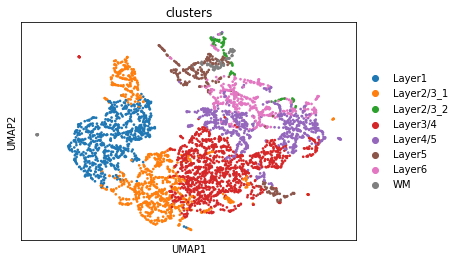

In [48]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['clusters'])

In [138]:
#%pip install fa2
# Let’s use the annotated clusters for PAGA.
sc.tl.paga(adata, groups='clusters')

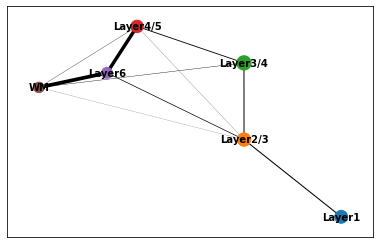

In [139]:
sc.pl.paga(adata, color='clusters', show=True)

In [146]:
adata.uns
#adata.uns['clusters_colors'][0] = "#59A14F"

OverloadedDict, wrapping:
	OrderedDict([('neighbors', {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 4, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'use_rep': 'Ez_u'}}), ('paga', {'connectivities': <6x6 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>, 'connectivities_tree': <6x6 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>, 'groups': 'clusters', 'pos': array([[ 3.7782047038, -6.9424612688],
       [ 2.4853093747, -5.185431401 ],
       [ 2.4842748899, -3.4423407632],
       [ 1.062032974 , -2.6117214586],
       [ 0.6620353951, -3.6683513663],
       [-0.243230618 , -3.9997431753]])}), ('clusters_sizes', array([ 765,  888, 1177,  668,  393,  335])), ('clusters_colors', ['#59A14F', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])])
With overloaded keys:
	['neighbors'].

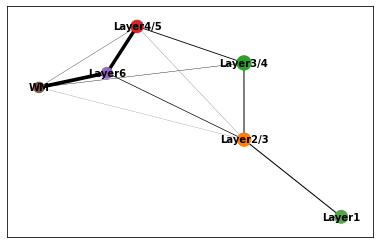

In [147]:
sc.pl.paga(adata, color='clusters', show=True)

In [115]:
#adata
#colors = ["#59A14F", "#9C755F", "#BAB0AC", "#4E79A7", "#aec7e8", "#76B7B2"]

In [160]:
import matplotlib.pyplot as plt
#sc.pl.paga(adata, color=['clusters'],threshold=0.1, cmap=colors)
color_dict = {
    'Layer1': '#F28E2B',
    'Layer2/3': '#9C755F',
    'Layer3/4': '#59A14F',
    'Layer4/5': '#BAB0AC',
    'Layer6': '#76B7B2',
    'WM': '#E15759'
    # Add more categories and corresponding colors as needed
}
#adata.obs['cell_colors'] = adata.obs['clusters'].map(color_dict)
#sort_cls.map(color_dict)
col_cls = [color_dict[element] for element in sort_cls]
print(col_cls)

['#F28E2B', '#9C755F', '#59A14F', '#BAB0AC', '#76B7B2', '#E15759']


In [164]:
n_len = len(adata.uns['clusters_colors'])
print(n_len)
for i in range(n_len):
 adata.uns['clusters_colors'][i] = col_cls[i]
print(adata.uns['clusters_colors'])


6
['#F28E2B', '#9C755F', '#59A14F', '#BAB0AC', '#76B7B2', '#E15759']


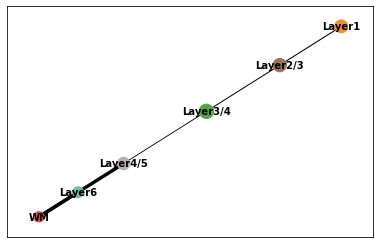

In [165]:
sc.pl.paga(adata, color=['clusters'],threshold=0.1)

In [19]:
sc.pl.paga(adata, threshold=0.1, show=False, save='dlpfc12_thr0.1_sample1_paga.pdf', fontsize=7,title='Sample 1')

<Axes:title={'center':'Sample 1'}>

In [20]:
sc.pl.paga(adata, threshold=0.5, show=False, save='dlpfc12_thr0.5_sample1_paga.pdf', fontsize=7,title='Sample 1')

<Axes:title={'center':'Sample 1'}>

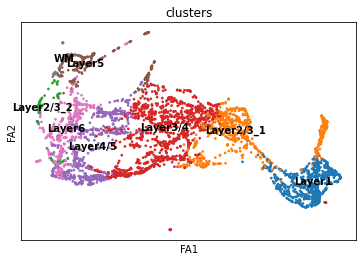

In [53]:
# 用PAGA的结果重新计算嵌入，也就是使得细胞的结构与PAGA的结构一致
sc.tl.draw_graph(adata, init_pos='paga')
sc.pl.draw_graph(adata, color=['clusters'], legend_loc='on data')


In [60]:
## Reconstructing gene changes along PAGA paths for a given set of genes
## Choose a root cell for diffusion pseudotime.
adata.uns['iroot'] = np.flatnonzero(adata.obs['clusters']  == 'WM')[2]
sc.tl.dpt(adata)

In [57]:
adata.obs['dpt_pseudotime']

1       0.315036
2       0.321404
3       0.292690
4       0.057356
5       0.267488
          ...   
4222    0.325298
4223    0.263898
4224    0.036902
4225    0.295129
4226    0.302012
Name: dpt_pseudotime, Length: 4226, dtype: float32

In [ ]:
sc.tl.draw_graph(adata, init_pos='paga')

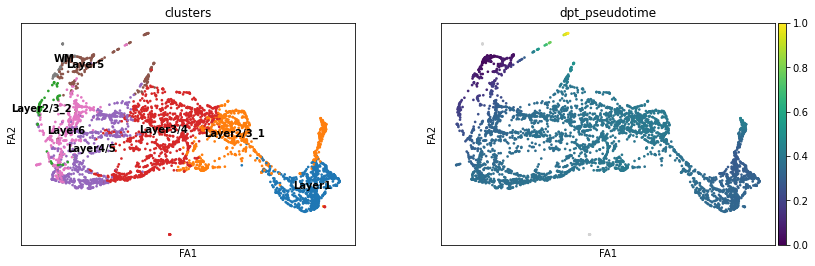

In [61]:

sc.pl.draw_graph(adata, color=['clusters', 'dpt_pseudotime'], legend_loc='on data')

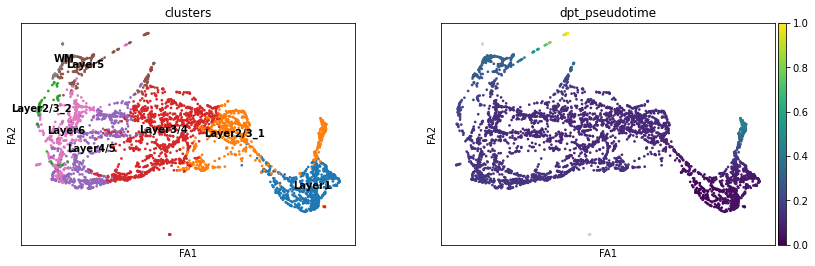

In [59]:
## Choose a root cell for diffusion pseudotime.
adata.uns['iroot'] = np.flatnonzero(adata.obs['clusters']  == 'Layer1')[0]
sc.tl.dpt(adata)

sc.pl.draw_graph(adata, color=['clusters', 'dpt_pseudotime'], legend_loc='on data')

In [22]:
## Select some of the marker gene names.
gene_names = ["FGAP", "AQP4", "HPCAL1", "ENC1", "TESPAL", "HOPX", "NEFH","NEFM","NEFL","SCN1B","PCP4","CAMK2D","IPCEF1","TMSB10",
              "DIRAS2","EFHD2","PLP1", "MBP","MOBP","CNP"]  

In [26]:
## Use the full raw data for visualization.
#adata2 = anndata.read_text('/home/yangyi/Xingjie/run/embryo2_count.txt',first_column_names = True, delimiter = '\t')
#adata2.var.index = gene.iloc[:, 0]
adata_raw = adata
sc.pp.log1p(adata_raw)
sc.pp.scale(adata_raw)
adata.raw = adata_raw

In [33]:
#?sc.pl.draw_graph
adata

AnnData object with n_obs × n_vars = 4226 × 2000
    obs: 'clusters', 'dpt_pseudotime'
    var: 'mean', 'std'
    uns: 'neighbors', 'draw_graph', 'paga', 'clusters_sizes', 'clusters_colors', 'iroot', 'diffmap_evals', 'log1p'
    obsm: 'Ez_u', 'X_draw_graph_fr', 'X_diffmap'
    obsp: 'distances', 'connectivities'

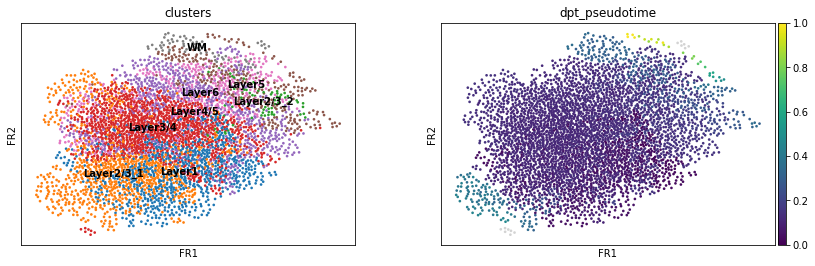

In [29]:
sc.pl.draw_graph(adata, color=['clusters', 'dpt_pseudotime'], use_raw=True,legend_loc='on data',  save="dlpfc12_sample1_dpt_pseudotime.pdf")
# layer='Ez_u',

In [34]:
paths = [('Layer1', ['Layer2/3_1', 'Layer3/4', 
                                        "Layer4/5"]),
        ('WM', ['Layer5', 'Layer6'])]


In [35]:
adata.obs['distance'] = adata.obs['dpt_pseudotime']

In [ ]:
sc.pl.paga_path(
        adata, path=["Layer4/5"],keys =gene_names[0:3],
        show_node_names=False,
        #use_raw=False,
        ax=axs[0],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['distance'],
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='Greys',
        groups_key='clusters',
        color_maps_annotations={'distance': 'viridis'},
        title='{} path'.format('Layer1'),
        return_data=True,
        show=False)

In [ ]:
_, axs = pl.subplots(ncols=2, figsize=(6, 2.5), gridspec_kw={'wspace': 0.05, 'left': 0.12})
pl.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(paths):
    _, data = sc.pl.paga_path(
        adata, path, gene_names,
        show_node_names=False,
        #use_raw=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['distance'],
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='Greys',
        groups_key='clusters',
        color_maps_annotations={'distance': 'viridis'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)
    data.to_csv('./write/paga_path_{}.csv'.format(descr))
pl.savefig('./figures/paga_path_dlpfc12_sample1.pdf')
pl.show()

In [101]:
os.getcwd()
color_dict_our = {
    'Layer1': '#F28E2B',
    'Layer2/3': '#9C755F',
    'Layer3/4': '#59A14F',
    'Layer4/5': '#BAB0AC',
    'Layer6': '#76B7B2',
    'WM': '#E15759'
    # Add more categories and corresponding colors as needed
    }

'/nas/LiuWei/Projects/IntTemporalSpatial/DLPFC12/DR_Rdata/paga_analysis'

/tmp/ipykernel_57741/3123472760.py:17: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df_count)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:872: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


['Layer1', 'Layer2/3', 'Layer3/4', 'Layer4/5', 'Layer6', 'WM']
['#4E79A7', '#EDC948', '#F28E2B', '#B07AA1', '#76B7B2', '#E15759']
6
['#4E79A7', '#EDC948', '#F28E2B', '#B07AA1', '#76B7B2', '#E15759']


/tmp/ipykernel_57741/3123472760.py:17: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df_count)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:872: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


['Layer1', 'Layer2/3', 'Layer3/4', 'Layer4/5', 'Layer6', 'WM']
['#4E79A7', '#EDC948', '#F28E2B', '#B07AA1', '#76B7B2', '#E15759']
6
['#4E79A7', '#EDC948', '#F28E2B', '#B07AA1', '#76B7B2', '#E15759']


/tmp/ipykernel_57741/3123472760.py:17: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df_count)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:872: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


['Layer1', 'Layer2/3', 'Layer3/4', 'Layer4/5', 'Layer6', 'WM']
['#4E79A7', '#EDC948', '#F28E2B', '#B07AA1', '#76B7B2', '#E15759']
6
['#4E79A7', '#EDC948', '#F28E2B', '#B07AA1', '#76B7B2', '#E15759']


/tmp/ipykernel_57741/3123472760.py:17: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df_count)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:872: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


['Layer1', 'Layer2/3', 'Layer3/4', 'Layer4/5', 'Layer6']
['#4E79A7', '#EDC948', '#F28E2B', '#B07AA1', '#76B7B2']
5
['#4E79A7', '#EDC948', '#F28E2B', '#B07AA1', '#76B7B2']


/tmp/ipykernel_57741/3123472760.py:17: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df_count)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:872: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


['Layer1', 'Layer2/3', 'Layer3/4', 'Layer4/5', 'Layer6', 'WM']
['#4E79A7', '#EDC948', '#F28E2B', '#B07AA1', '#76B7B2', '#E15759']
6
['#4E79A7', '#EDC948', '#F28E2B', '#B07AA1', '#76B7B2', '#E15759']


/tmp/ipykernel_57741/3123472760.py:17: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df_count)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:872: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


['Layer2/3', 'Layer3/4', 'Layer4/5', 'Layer6', 'WM']
['#EDC948', '#F28E2B', '#B07AA1', '#76B7B2', '#E15759']
5
['#EDC948', '#F28E2B', '#B07AA1', '#76B7B2', '#E15759']


/tmp/ipykernel_57741/3123472760.py:17: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df_count)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:872: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


['Layer2/3', 'Layer3/4', 'Layer4/5', 'Layer6', 'WM']
['#EDC948', '#F28E2B', '#B07AA1', '#76B7B2', '#E15759']
5
['#EDC948', '#F28E2B', '#B07AA1', '#76B7B2', '#E15759']


/tmp/ipykernel_57741/3123472760.py:17: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df_count)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:872: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


['Layer1', 'Layer2/3', 'Layer3/4', 'Layer4/5', 'Layer6', 'WM']
['#4E79A7', '#EDC948', '#F28E2B', '#B07AA1', '#76B7B2', '#E15759']
6
['#4E79A7', '#EDC948', '#F28E2B', '#B07AA1', '#76B7B2', '#E15759']


/tmp/ipykernel_57741/3123472760.py:17: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df_count)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:872: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


['Layer2/3', 'Layer3/4', 'Layer4/5', 'Layer6', 'WM']
['#EDC948', '#F28E2B', '#B07AA1', '#76B7B2', '#E15759']
5
['#EDC948', '#F28E2B', '#B07AA1', '#76B7B2', '#E15759']


/tmp/ipykernel_57741/3123472760.py:17: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df_count)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:872: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


['Layer1', 'Layer2/3', 'Layer3/4', 'Layer4/5', 'Layer6', 'WM']
['#4E79A7', '#EDC948', '#F28E2B', '#B07AA1', '#76B7B2', '#E15759']
6
['#4E79A7', '#EDC948', '#F28E2B', '#B07AA1', '#76B7B2', '#E15759']


/tmp/ipykernel_57741/3123472760.py:17: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df_count)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:872: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


['Layer1', 'Layer2/3', 'Layer3/4', 'Layer4/5', 'Layer6', 'WM']
['#4E79A7', '#EDC948', '#F28E2B', '#B07AA1', '#76B7B2', '#E15759']
6
['#4E79A7', '#EDC948', '#F28E2B', '#B07AA1', '#76B7B2', '#E15759']


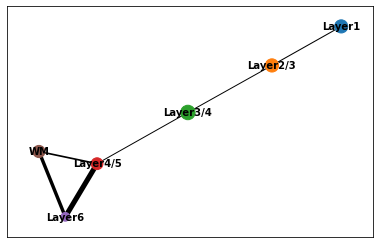

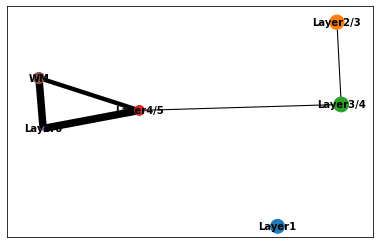

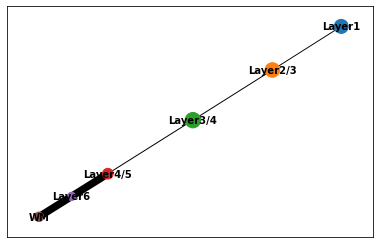

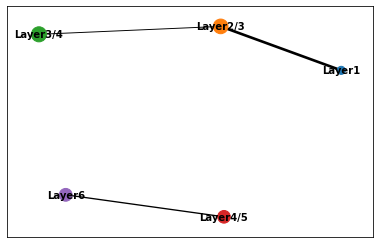

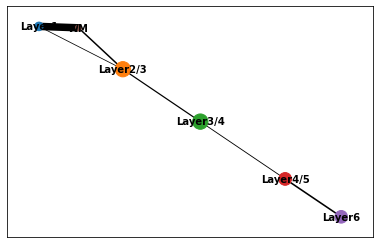

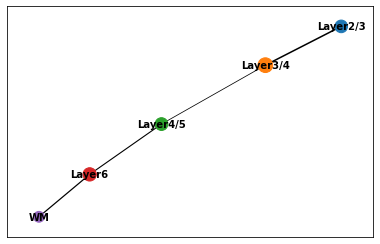

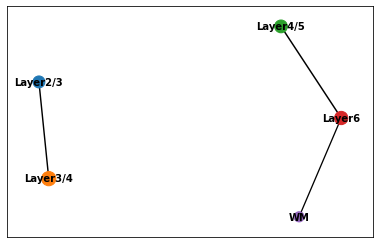

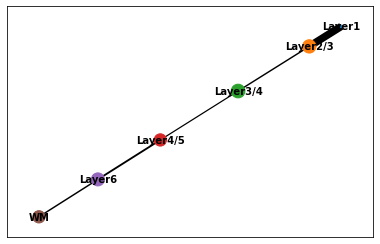

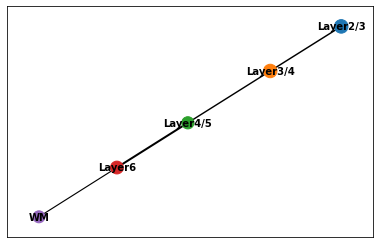

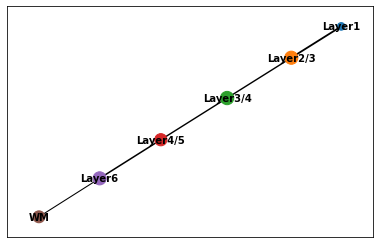

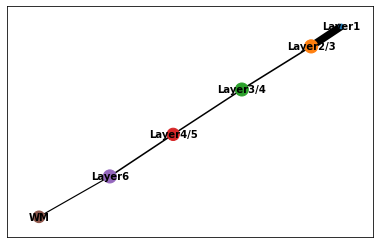

In [174]:
color_dict = {
    'Layer1': '#4E79A7',
    'Layer2/3': '#EDC948',
    'Layer3/4': '#F28E2B',
    'Layer4/5': '#B07AA1',
    'Layer6': '#76B7B2',
    'WM': '#E15759'
    # Add more categories and corresponding colors as needed
    }
### Write for loop to run all samples
nsamp = 12
for r in range(1, nsamp):
    df_tmp = pd.read_csv('cluster_iscmeb_pois_rename_L52WM_sample'+str(r+1)+'_DLPFC12.csv')
    celltype_tmp = df_tmp.x
    # read the CSV file into a DataFrame
    df_count = pd.read_csv('rawcount_sample'+str(r+1)+'_DLPFC12.csv', index_col=0)
    adata = anndata.AnnData(df_count)
    # set the names of the observations and variables
    adata.obs_names = df_count.index.tolist()
    adata.var_names = df_count.columns.tolist()
    ## read embeddings
    Ez_u = pd.read_csv('uncorrected_embed_pois_sample'+str(r+1)+'_DLPFC12.csv', index_col = 0, header = 0)
    adata.obsm['Ez_u'] = Ez_u
    adata.obs['clusters'] = celltype_tmp.values
    sc.pp.neighbors(adata, n_neighbors=4, use_rep = 'Ez_u')
    sc.tl.draw_graph(adata)
    #sc.pl.draw_graph(adata, color='clusters', legend_loc='on data', show=False, save='dlpfc12_ourembed_sample'+str(r+1)+'_paga.png', title='Sample '+str(r+1))
    #%pip install fa2
    # Let’s use the annotated clusters for PAGA.
    sc.tl.paga(adata, groups='clusters')
 
    unicls = adata.obs['clusters'].unique().tolist()
    sort_cls = sorted(unicls)
    print(sort_cls)
    col_cls = [color_dict[element] for element in sort_cls]
    print(col_cls)
    sc.pl.paga(adata, threshold=0.1, show=False)
    n_len = len(adata.uns['clusters_colors'])
    print(n_len)
    for i in range(n_len):
     adata.uns['clusters_colors'][i] = col_cls[i]
    print(adata.uns['clusters_colors'])
    sc.pl.paga(adata, threshold=0.1, show=False, save='dlpfc12_thr0.1_sample'+str(r+1)+'_paga.pdf', fontsize=7,title='Sample '+str(r+1))
    # 用PAGA的结果重新计算嵌入，也就是使得细胞的结构与PAGA的结构一致
    sc.tl.draw_graph(adata, init_pos='paga')
    #sc.pl.draw_graph(adata, color=['clusters'], legend_loc='on data', show=False, save='dlpfc12_paga_embed2_sample'+str(r+1)+'_paga.png', title='Sample '+str(r+1))
    ## Reconstructing gene changes along PAGA paths for a given set of genes
    ## Choose a root cell for diffusion pseudotime.
    if (sum(adata.obs['clusters']  == 'WM')>0):
        adata.uns['iroot'] = np.flatnonzero(adata.obs['clusters']  == 'WM')[0]
    elif(sum(adata.obs['clusters']  == 'Layer6')>0):
        adata.uns['iroot'] = np.flatnonzero(adata.obs['clusters']  == 'Layer6')[0]
    elif(sum(adata.obs['clusters']  == 'Layer5/6')>0):
        adata.uns['iroot'] = np.flatnonzero(adata.obs['clusters']  == 'Layer5/6')[0]
    sc.tl.dpt(adata)
    sc.pl.draw_graph(adata, color=['clusters', 'dpt_pseudotime'], legend_loc='on data', show=False, save='dlpfc12_dpt_sample'+str(r+1)+'_paga.pdf', title='Sample '+str(r+1))

In [85]:
df_tmp = pd.read_csv('cluster_iscmeb_pois_rename_sample'+str(4+1)+'_DLPFC12.csv')
celltype_tmp = df_tmp.x

In [87]:
celltype_tmp.unique()
#sum(celltype_tmp == 'WM')

array(['Layer3/4', 'Layer6', 'Layer2/3_1', 'Layer4/5', 'Layer2/3_2',
       'Layer1'], dtype=object)

In [84]:
np.flatnonzero(celltype_tmp == 'WM')[2]

91

In [167]:
    r=0
    df_tmp = pd.read_csv('cluster_iscmeb_pois_rename_L52WM_sample'+str(r+1)+'_DLPFC12.csv')
    celltype_tmp = df_tmp.x
    # read the CSV file into a DataFrame
    df_count = pd.read_csv('rawcount_sample'+str(r+1)+'_DLPFC12.csv', index_col=0)
    adata = anndata.AnnData(df_count)
    # set the names of the observations and variables
    adata.obs_names = df_count.index.tolist()
    adata.var_names = df_count.columns.tolist()
    ## read embeddings
    Ez_u = pd.read_csv('uncorrected_embed_pois_sample'+str(r+1)+'_DLPFC12.csv', index_col = 0, header = 0)
    adata.obsm['Ez_u'] = Ez_u
    adata.obs['clusters'] = celltype_tmp.values
    sc.pp.neighbors(adata, n_neighbors=4, use_rep = 'Ez_u')
    sc.tl.draw_graph(adata)
    #sc.pl.draw_graph(adata, color='clusters', legend_loc='on data', show=False, save='dlpfc12_ourembed_sample'+str(r+1)+'_paga.png', title='Sample '+str(r+1))
    #%pip install fa2
    # Let’s use the annotated clusters for PAGA.
    sc.tl.paga(adata, groups='clusters')
 
    unicls = adata.obs['clusters'].unique().tolist()
    sort_cls = sorted(unicls)
    print(sort_cls)
    col_cls = [color_dict[element] for element in sort_cls]
    print(col_cls)
    

/tmp/ipykernel_57741/4029864839.py:6: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df_count)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/weiliu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:872: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


['Layer1', 'Layer2/3', 'Layer3/4', 'Layer4/5', 'Layer6', 'WM']
['#F28E2B', '#9C755F', '#59A14F', '#BAB0AC', '#76B7B2', '#E15759']


<Axes:>

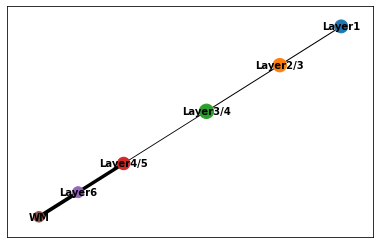

In [170]:
sc.pl.paga(adata, threshold=0.1, show=False)

In [168]:
n_len = len(adata.uns['clusters_colors'])

KeyError: 'clusters_colors'

In [171]:
adata.uns

OverloadedDict, wrapping:
	OrderedDict([('neighbors', {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 4, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'use_rep': 'Ez_u'}}), ('draw_graph', {'params': {'layout': 'fa', 'random_state': 0}}), ('paga', {'connectivities': <6x6 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>, 'connectivities_tree': <6x6 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>, 'groups': 'clusters', 'pos': array([[ 7.7680479067, -3.32305835  ],
       [ 5.8645935181, -3.8886931088],
       [ 3.5950355256, -4.5624987453],
       [ 1.0300999705, -5.324296264 ],
       [-0.3804178678, -5.7430313639],
       [-1.5925798289, -6.1024235209]])}), ('clusters_sizes', array([ 765,  888, 1177,  668,  393,  335])), ('clusters_colors', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])])
Wit